In [13]:
import pandas as pd

trader_data = "/content/drive/MyDrive/Primetrade.ai/historical_data.csv"
sentiment_data = "/content/drive/MyDrive/Primetrade.ai/fear_greed_index.csv"

#Loading the dataset into DF.
trader_df = pd.read_csv(trader_data)
sentiment_df = pd.read_csv(sentiment_data)

#Checking whether data is correctly Loaded.
print("Historical Trader Data:")
display(trader_df.head())

print("\nBitcoin Market Sentiment Data:")
display(sentiment_df.head())


Historical Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Bitcoin Market Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


## Data Cleaning and Preparation

In [14]:
print("\n--- Initial Info for Trader Data ---")
trader_df.info()
print("\n--- Initial Info for Sentiment Data ---")
sentiment_df.info()


--- Initial Info for Trader Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-n

In [15]:
# Now, lets convert timestamp for both df in datetime format
# Clean the Trader Data
trader_df["Timestamp"] = pd.to_datetime(trader_df['Timestamp'], unit='ms')
# for merging with sentiment data
trader_df['merge_date'] = pd.to_datetime(trader_df['Timestamp'].dt.date)

# Clean the Sentiment  Data
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df.rename(columns={'date': 'merge_date'}, inplace=True)


In [16]:
# verify DF for changes made
print("Cleaned Trader data")
trader_df.info()
print(trader_df[['Timestamp', 'merge_date']].head())

Cleaned Trader data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  floa

In [17]:
print("Cleaned Sentiment  data")
sentiment_df.info()
print(sentiment_df.head())

Cleaned Sentiment  data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   merge_date      2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB
    timestamp  value classification merge_date
0  1517463000     30           Fear 2018-02-01
1  1517549400     15   Extreme Fear 2018-02-02
2  1517635800     40           Fear 2018-02-03
3  1517722200     24   Extreme Fear 2018-02-04
4  1517808600     11   Extreme Fear 2018-02-05


In [18]:
# Now lets merge the 2 dataset
merged_df = pd.merge(trader_df, sentiment_df, on='merge_date', how='inner')
print("The new DataFrame contains columns from both the trader and sentiment tables:")
merged_df.info()

The new DataFrame contains columns from both the trader and sentiment tables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184263 entries, 0 to 184262
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           184263 non-null  object        
 1   Coin              184263 non-null  object        
 2   Execution Price   184263 non-null  float64       
 3   Size Tokens       184263 non-null  float64       
 4   Size USD          184263 non-null  float64       
 5   Side              184263 non-null  object        
 6   Timestamp IST     184263 non-null  object        
 7   Start Position    184263 non-null  float64       
 8   Direction         184263 non-null  object        
 9   Closed PnL        184263 non-null  float64       
 10  Transaction Hash  184263 non-null  object        
 11  Order ID          184263 non-null  int64         
 12  Crossed           184263 non-null  b

In [19]:
print("\nSample of the Merged Data:")
display(merged_df[['Timestamp', 'Closed PnL', 'merge_date', 'classification']].head())


Sample of the Merged Data:


,Timestamp,Closed PnL,merge_date,classification
0,2024-10-27 03:33:20,0.0,2024-10-27,Greed
1,2024-10-27 03:33:20,0.0,2024-10-27,Greed
2,2024-10-27 03:33:20,0.0,2024-10-27,Greed
3,2024-10-27 03:33:20,0.0,2024-10-27,Greed
4,2024-10-27 03:33:20,0.0,2024-10-27,Greed


Total Trading Volume by Market Sentiment

 Total Trading Volume by Market Sentiment 
  classification      Size USD
0  Extreme Greed  3.940677e+07
1           Fear  7.041585e+08
2          Greed  1.155037e+08
3        Neutral  2.184323e+07


/tmp/ipython-input-2390548450.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=volume_analysis, x='classification', y='Size USD', palette=['#C64242', '#3DC642'])
/tmp/ipython-input-2390548450.py:12: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  barplot = sns.barplot(data=volume_analysis, x='classification', y='Size USD', palette=['#C64242', '#3DC642'])


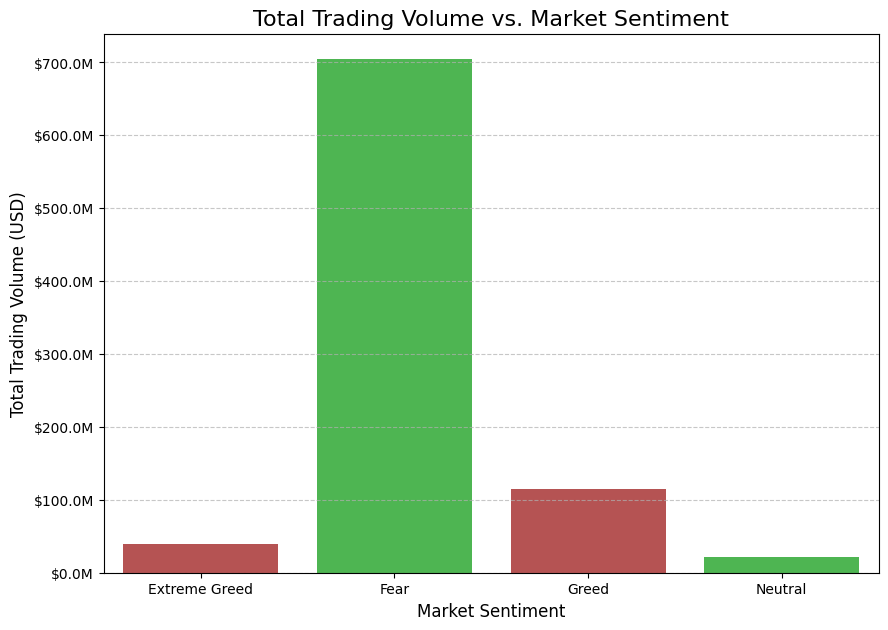

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


volume_analysis = merged_df.groupby('classification')['Size USD'].sum().reset_index()

print(" Total Trading Volume by Market Sentiment ")
print(volume_analysis)

plt.figure(figsize=(10, 7))
barplot = sns.barplot(data=volume_analysis, x='classification', y='Size USD', palette=['#C64242', '#3DC642'])

plt.title('Total Trading Volume vs. Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Total Trading Volume (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Reformating for better understanding
def format_in_millions(value, tick_number):

    return f'${value/1e6:,.1f}M'

formatter = FuncFormatter(format_in_millions)
plt.gca().yaxis.set_major_formatter(formatter)

# Display the chart
plt.show()

##Analyzing Profitability vs. Sentiment


--- Average Profit/Loss by Market Sentiment ---
  classification  Closed PnL
0  Extreme Greed   25.418772
1           Fear   50.047622
2          Greed   87.894859
3        Neutral   22.229713


/tmp/ipython-input-3663560017.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=profitability_analysis, x='classification', y='Closed PnL', palette=['#C64242', '#3DC642', '#D3D3D3', '#FFD700'])


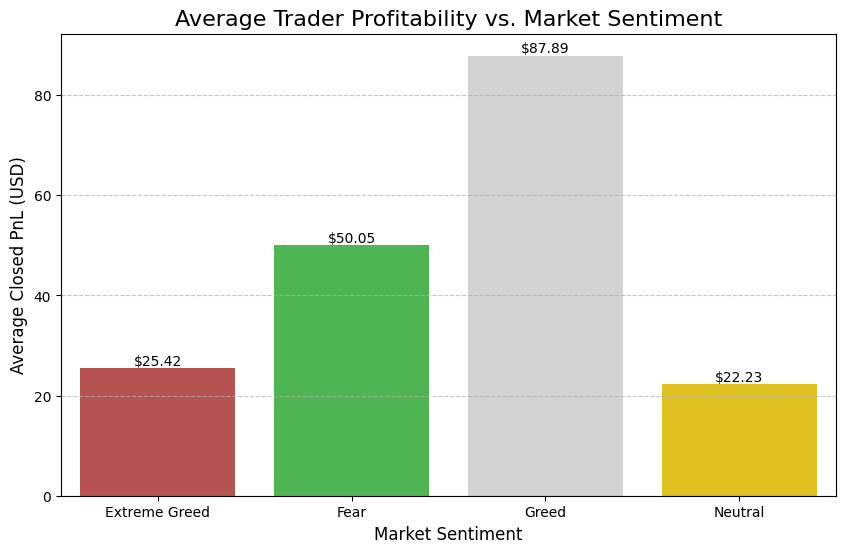

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


profitability_analysis = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

print("\n--- Average Profit/Loss by Market Sentiment ---")
print(profitability_analysis)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=profitability_analysis, x='classification', y='Closed PnL', palette=['#C64242', '#3DC642', '#D3D3D3', '#FFD700'])

plt.title('Average Trader Profitability vs. Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Average Closed PnL (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, row in profitability_analysis.iterrows():
    barplot.text(row.name, row['Closed PnL'], f'${row["Closed PnL"]:.2f}',
                 color='black', ha="center", va="bottom")

plt.show()

##Analyze Trade Direction

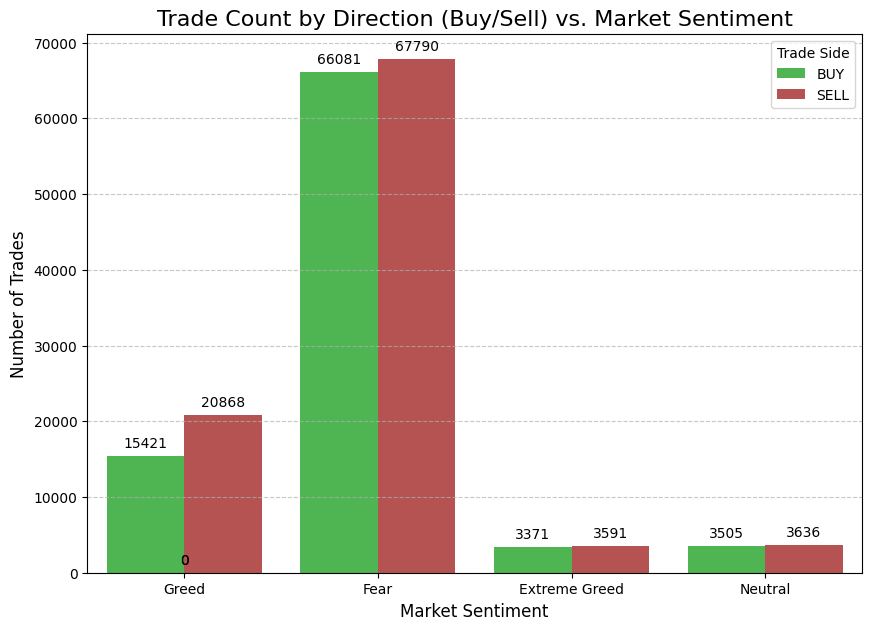

In [22]:
# Buy vs Sale
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))

ax = sns.countplot(data=merged_df, x='classification', hue='Side', palette={'BUY': '#3DC642', 'SELL': '#C64242'})


plt.title('Trade Count by Direction (Buy/Sell) vs. Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.legend(title='Trade Side')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

## Analyzing Risk  (Trade Size Distribution)



/tmp/ipython-input-4234074210.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='Size USD', palette=['#C64242', '#3DC642'])
/tmp/ipython-input-4234074210.py:8: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=merged_df, x='classification', y='Size USD', palette=['#C64242', '#3DC642'])


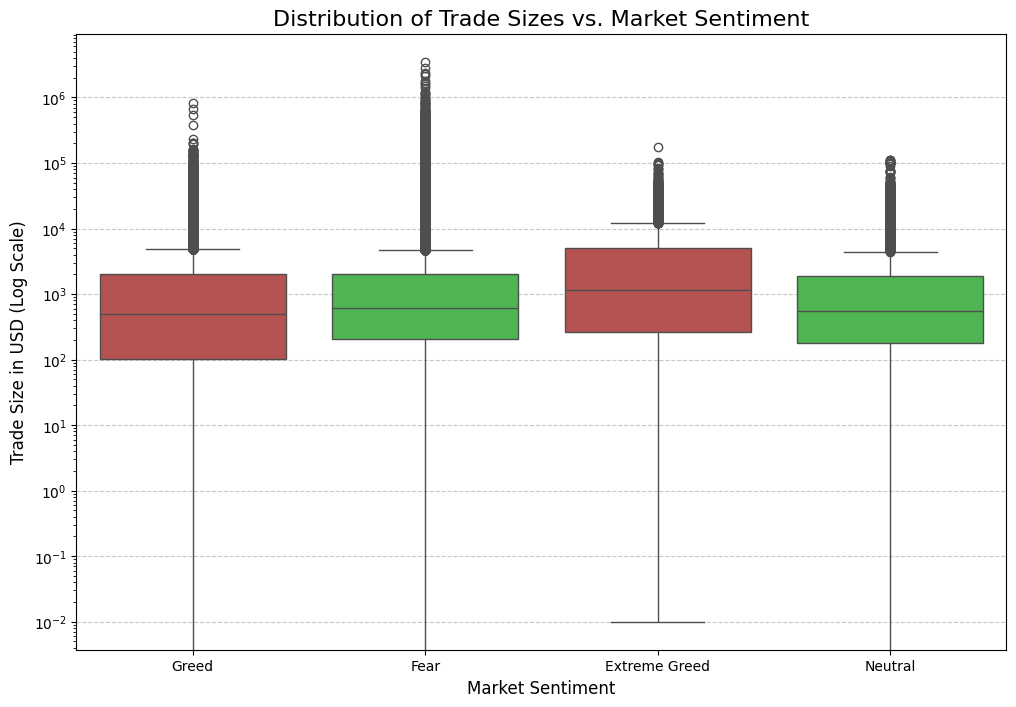

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))


sns.boxplot(data=merged_df, x='classification', y='Size USD', palette=['#C64242', '#3DC642'])


plt.yscale('log')


plt.title('Distribution of Trade Sizes vs. Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Trade Size in USD (Log Scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()